In [1]:
import sys
sys.path.insert(0, '../pypkg')

In [2]:
import math
import qubla as qbl
import qubla.lazyalg as qla
import qubla.sim as qbsim
import matplotlib.pyplot as plt

In [3]:
shorsrc = '''    
import qft;
import modular;

n = %d;
N = %d;
a = %d;
H = {0 : 1 / sqrt(2), 1 : 1 / sqrt(2)};
lstr = alloc(2*n);
for(i : seq(2*n))
    lstr[i] = qstate(H)[0];
r = quword(lstr);
x = modexp(uword{n}(a), r, N);
fr = qft(r);
output(x);
output(fr);
print(r);
print(x);
print(fr);
'''

In [4]:
nbits = 6
N = 35
a = 17
#nbits = 4
#N = 15
#a = 7

shorql = qbl.QuantumLogic()
shorql.compileSource(shorsrc % (nbits, N, a))
print('Logic stats:')
print(shorql.getStat())

print()
print('Stepwise reduce 1.:')
print(shorql.reduce())
print('Logic stats:')
print(shorql.getStat())

print()
print('Step joining:')
arriter = []
shorql.joinSteps(maxinqb=16, iterdata = arriter)
print('Logic stats:')
print(shorql.getStat())

print()
print('Stepwise reduce 2.:')
print(shorql.reduce())
print('Logic stats:')
print(shorql.getStat())

print()
print('Unitarization:')
print(shorql.unitarize(verbose = True))
print('Logic stats:')
print(shorql.getStat())

[qbit[0], qbit[1], qbit[2], qbit[3], qbit[4], qbit[5], qbit[6], qbit[7], qbit[8], qbit[9], qbit[10], qbit[11]]
[qbit[2596], qbit[2597], qbit[2598], qbit[2599], qbit[2600], qbit[2601]]
[qbit[11], qbit[10], qbit[9], qbit[8], qbit[7], qbit[6], qbit[5], qbit[4], qbit[3], qbit[2], qbit[1], qbit[0]]
Logic stats:
{'cntQubits': 2602, 'cntSteps': 3123, 'cntInitSteps': 12, 'cntTableSteps': 1987, 'cntGenOpSteps': 78, 'cntHedgeSteps': 1046, 'maxCntStepQubits': 5, 'maxCntStepInQubits': 3, 'maxCntStepOutQubits': 5, 'cplxWorst': 12056, 'cplxBest': 12413}

Stepwise reduce 1.:
{'cntunusednew': 686, 'cntreusedold': 1277}
Logic stats:
{'cntQubits': 639, 'cntSteps': 2686, 'cntInitSteps': 12, 'cntTableSteps': 1550, 'cntGenOpSteps': 78, 'cntHedgeSteps': 1046, 'maxCntStepQubits': 4, 'maxCntStepInQubits': 3, 'maxCntStepOutQubits': 4, 'cplxWorst': 9324, 'cplxBest': 9358}

Step joining:
Logic stats:
{'cntQubits': 18, 'cntSteps': 91, 'cntInitSteps': 12, 'cntTableSteps': 1, 'cntGenOpSteps': 78, 'cntHedgeSteps': 0

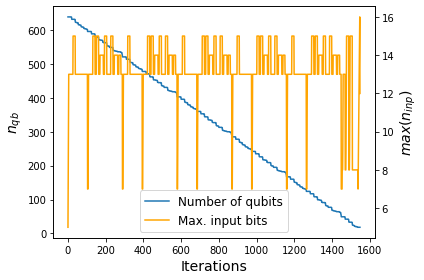

In [5]:
plt.rcParams["figure.autolayout"] = True
fig,axl=plt.subplots()
axl.plot([e[1] for e in arriter], label = 'Number of qubits')
axl.set_xlabel("Iterations", fontsize = 14)
axl.set_ylabel("$n_{qb}$",fontsize=14)
axr = axl.twinx()
axr.plot([e[2] for e in arriter], color="orange", label = 'Max. input bits')
axr.set_ylabel("$max(n_{inp})$",fontsize=14)
handl, labl = axl.get_legend_handles_labels()
handr, labr = axr.get_legend_handles_labels()
hands = handl + handr
labs = labl + labr
axr.legend(hands, labs, loc='lower center', fontsize=12)
plt.show()

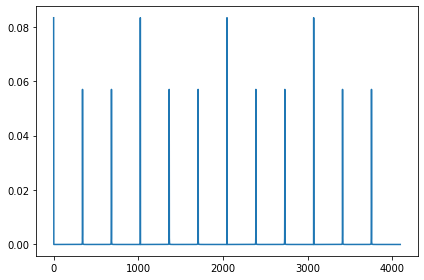

In [6]:
shorql.comprQBits()
finalst = qbsim.statevec(shorql)
stdens = qbsim.getDens(finalst, shorql.getOutBits(1, True))
plt.plot(stdens)

In [7]:
nbase = 1<<(2*nbits)
peak1 = min([i for i in range(1,nbase) if stdens[i] > stdens[0]/10])
r = int(nbase/peak1)
print('x -> %d^x mod %d is periodic for %d ' % (a, N, r))
if r % 2 == 0:
    factor = qla.gcdEucl(a**(r//2) - 1, N)
    if factor == 1:
        print('factor is 1, please choose another base for modular exponentiation!')
    else:
        print('A factor of %d is %d' % (N,factor))
else:
    print('Period is odd, please choose another base for modular exponentiation!')


x -> 17^x mod 35 is periodic for 12 
A factor of 35 is 7
